In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [17]:
##Data
K = 120
r1 = np.array([3, 5, 2, 7, 7, 2, 5, 3, 5, 11, 6, 6, 11, 4, 4, 2, 8, 8, 6, 5, 15, 4, 9, 9, 4, 12, 8, 8, 6, 
       8, 12, 4, 7, 16, 12, 9, 4, 7, 8, 11, 5, 12, 8, 17, 9, 3, 2, 7, 6, 5, 11, 14, 13, 8, 6, 4, 
       8, 4, 8, 7, 15, 15, 9, 9, 5, 6, 3, 9, 12, 14, 16, 17, 8, 8, 9, 5, 9, 11, 6, 14, 21, 16, 6, 
       9, 8, 9, 8, 4, 11, 11, 6, 9, 4, 4, 9, 9, 10, 14, 6, 3, 4, 6, 10, 4, 3, 3, 10, 4, 10, 5, 4, 
       3, 13, 1, 7, 5, 7, 6, 3, 7])
n1 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52, 55, 61, 31, 
       48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 
       43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 60, 46, 28, 
       33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 
       58, 62, 52, 41, 34, 52, 63, 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 
       45, 51, 55, 41, 53, 51, 42, 46, 54, 32])
r0 = np.array([0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 4, 4, 2, 1, 7, 4, 3, 5, 3, 2, 4, 1, 4, 5, 2, 7, 5, 8, 2, 
       3, 5, 4, 1, 6, 5, 11, 5, 2, 5, 8, 5, 6, 6, 10, 7, 5, 5, 2, 8, 1, 13, 9, 11, 9, 4, 4, 8, 
       6, 8, 6, 8, 14, 6, 5, 5, 2, 4, 2, 9, 5, 6, 7, 5, 10, 3, 2, 1, 7, 9, 13, 9, 11, 4, 8, 2, 
       3, 7, 4, 7, 5, 6, 6, 5, 6, 9, 7, 7, 7, 4, 2, 3, 4, 10, 3, 4, 2, 10, 5, 4, 5, 4, 6, 5, 3, 
       2, 2, 4, 6, 4, 1])
n0 = np.array([28, 21, 32, 35, 35, 38, 30, 43, 49, 53, 31, 35, 46, 53, 61, 40, 29, 44, 52, 55, 61, 31, 
       48, 44, 42, 53, 56, 71, 43, 43, 43, 40, 44, 70, 75, 71, 37, 31, 42, 46, 47, 55, 63, 91, 
       43, 39, 35, 32, 53, 49, 75, 64, 69, 64, 49, 29, 40, 27, 48, 43, 61, 77, 55, 60, 46, 28, 
       33, 32, 46, 57, 56, 78, 58, 52, 31, 28, 46, 42, 45, 63, 71, 69, 43, 50, 31, 34, 54, 46, 
       58, 62, 52, 41, 34, 52, 63, 59, 88, 62, 47, 53, 57, 74, 68, 61, 45, 45, 62, 73, 53, 39, 
       45, 51, 55, 41, 53, 51, 42, 46, 54, 32])
year = np.array([-10, -9, -9, -8, -8, -8, -7, -7, -7, -7, -6, -6, -6, -6, -6, -5, -5, -5, -5, -5, -5, 
         -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, 
         -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 
         4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 10])

In [18]:
def logvraissemblance_r0(mu, r0, n0):
    r = 0
    for i in range(len(mu)):
        r += r0[i] * np.log(1/(1+np.exp(-mu[i]))) + (n0[i] - r0[i]) * np.log(1 - (1/(1+np.exp(-mu[i]))))
    return r

def logvraissemblance_r1(mu, alpha, beta1, beta2, b, year, r1, n1):
    r = 0
    for i in range(len(mu)):
        r += r1[i] * np.log(1/(1+np.exp(-(mu[i] + alpha + beta1*year[i] + beta2*(year[i]**2-22) + b[i])))) + (n1[i] - r1[i]) * np.log(1 - (1/(1+np.exp(-(mu[i] + alpha + beta1*year[i] + beta2*(year[i]**2-22) + b[i])))))
    return r

In [99]:
def gibbs(n_iterations, burnin, prop_sd,param_init,mu_init,bi_init, K,r1,r0,n1,n0,year):
    
    chain = np.zeros((n_iterations + 1, 4))
    chain[0, :] = param_init
    acc_rates = np.zeros(4)

    
    chain_mu = np.zeros((n_iterations + 1, K))
    chain_mu[0, :] = mu_init
    acc_rates_mu = np.zeros(K)

    
    chain_bi = np.zeros((n_iterations + 1, K))
    chain_bi[0, :] = mu_init
    acc_rates_bi = np.zeros(K)

    
    for i in range(1, n_iterations):
        
        alpha = chain[i,0]
        beta1 = chain[i,1]
        beta2 = chain[i,2]
        sigma = chain[i,3]

        mu = chain_mu[i, :]
        bi = chain_bi[i, :]
        
        # Mise à jour de alpha
        prop = np.random.normal(alpha, np.sqrt(prop_sd[0]))
        
        top = - prop**2 / (2 * 1E6) + logvraissemblance_r1(mu, prop, beta1, beta2, bi,year, r1, n1)
        bottom = - alpha**2 / (2 * 1E6) + logvraissemblance_r1(mu, alpha, beta1, beta2, bi,year, r1, n1)
          
        acc_prob = np.exp(top - bottom)
          
        if np.random.uniform() < acc_prob:
            alpha = prop
            acc_rates[0] += 1
        
        
        # Mise à jour de beta1
        prop = np.random.normal(beta1, np.sqrt(prop_sd[1]))
        
        top = - prop**2 / (2 * 1E6) + logvraissemblance_r1(mu, alpha, prop, beta2, bi,year, r1, n1)
        bottom = - beta1**2 / (2 * 1E6) + logvraissemblance_r1(mu, alpha, beta1, beta2, bi,year, r1, n1)
          
        acc_prob = np.exp(top - bottom)
          
        if np.random.uniform() < acc_prob:
            beta1 = prop
            acc_rates[1] += 1        
            
        # Mise à jour de beta1
        prop = np.random.normal(beta2, np.sqrt(prop_sd[2]))
        
        top = - prop**2 / (2 * 1E6) + logvraissemblance_r1(mu, alpha, beta1, prop, bi,year, r1, n1)
        bottom = - beta2**2 / (2 * 1E6) + logvraissemblance_r1(mu, alpha, beta1, beta2, bi,year, r1, n1)
          
        acc_prob = np.exp(top - bottom)
          
        if np.random.uniform() < acc_prob:
            beta2 = prop
            acc_rates[2] += 1
        
        ## Mise à jour de sigma
        a = prop_sd[3] + K/2
        b = (2 * prop_sd[4] + (np.sum(bi**2)/2))

        sigma = 1/np.sqrt(np.random.gamma(shape=a, scale=1/b))
        
        ## Mise à jour de mu
        for j in range(K):
            prop = np.random.normal(mu[j],prop_sd[5])
            
            top = - prop**2 / (2 * sigma**2) + r0[j] * np.log(1/(1+np.exp(-prop))) + (n0[j] - r0[j]) * np.log(1 - 1/(1+np.exp(-prop))) + r1[j] * np.log(1/(1+np.exp(-prop - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j]))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-prop - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j])))
            
            bottom = - mu[j]**2 / (2 * sigma**2) + r0[j] * np.log(1/(1+np.exp(-mu[j]))) + (n0[j] - r0[j]) * np.log(1 - 1/(1+np.exp(-mu[j]))) + r1[j] * np.log(1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j]))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j])))
            
            acc_prob=np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                mu[j] = prop
                acc_rates_mu[j] += 1
        
        ## Mise à jour de b
        for j in range(K):
            prop = np.random.normal(bi[j],prop_sd[6])
            
            top = - prop**2 / (2 * sigma**2) + r1[j] * np.log(1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - prop))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - prop)))
            
            bottom = - bi[j]**2 / (2 * sigma**2) + r1[j] * np.log(1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j]))) +(n1[j] - r1[j]) * np.log(1 - 1/(1+np.exp(-mu[j] - alpha - beta1*year[j] - beta2*(year[j]**2-22) - bi[j])))
            
            acc_prob=np.exp(top - bottom)
            
            if np.random.uniform() < acc_prob:
                bi[j] = prop
                acc_rates_bi[j] += 1
        
        ##Mis a jour chaine
        chain[i+1,0] = alpha
        chain[i+1,1] = beta1
        chain[i+1,2] = beta2
        chain[i+1,3] = sigma
        chain_mu[i+1,:]=mu
        chain_bi[i+1,:]=bi
        
        
    ##Accetation rate
    acc_rates = acc_rates / n_iterations
    acc_rates_bi = acc_rates_bi / n_iterations
    acc_rates_mu = acc_rates_mu / n_iterations
    
    ##Burnin
    chain = chain[burnin:]
    chain_bi = chain_bi[burnin:]
    chain_mu = chain_mu[burnin:]
        
    return chain,chain_bi,chain_mu,acc_rates,acc_rates_bi,acc_rates_mu

        
        
        

In [117]:
prop_sd_init=[0.0075, 0.0005, 0.000009, 0.1, 0.1, .5, .5]
param_init=[0,0,0,1]
mu_init=np.zeros(120)
bi_init=np.zeros(120)
chain,chain_bi,chain_mu,acc_rates,acc_rates_bi,acc_rates_mu=gibbs(10000, 1000, prop_sd_init,param_init,mu_init,bi_init, K,r1,r0,n1,n0,year)

In [118]:
acc_rates

array([0.4646, 0.4352, 0.5399, 0.    ])

In [119]:
acc_rates_bi

array([0.4887, 0.4878, 0.4936, 0.4799, 0.4776, 0.4974, 0.4848, 0.4732,
       0.471 , 0.4538, 0.4662, 0.4769, 0.4678, 0.4808, 0.4698, 0.4784,
       0.4855, 0.4674, 0.4739, 0.4689, 0.4448, 0.4794, 0.4691, 0.4664,
       0.4754, 0.4556, 0.4587, 0.4561, 0.4626, 0.4737, 0.4567, 0.4789,
       0.4674, 0.4358, 0.432 , 0.4425, 0.4812, 0.4869, 0.472 , 0.4387,
       0.4715, 0.4572, 0.4552, 0.425 , 0.4536, 0.4828, 0.4743, 0.4717,
       0.471 , 0.4703, 0.427 , 0.4413, 0.441 , 0.4474, 0.4634, 0.4794,
       0.4682, 0.4847, 0.4618, 0.4675, 0.4403, 0.4303, 0.4411, 0.453 ,
       0.4702, 0.4726, 0.488 , 0.4824, 0.4522, 0.4449, 0.4464, 0.4259,
       0.4564, 0.4534, 0.4779, 0.4854, 0.471 , 0.4578, 0.4578, 0.4319,
       0.4267, 0.4366, 0.4781, 0.4625, 0.4799, 0.4635, 0.4543, 0.4743,
       0.4552, 0.4445, 0.4596, 0.4692, 0.4861, 0.4785, 0.451 , 0.451 ,
       0.4477, 0.4334, 0.4739, 0.4818, 0.4819, 0.4597, 0.4524, 0.4634,
       0.4859, 0.4867, 0.4578, 0.4663, 0.4667, 0.4781, 0.4772, 0.4886,
      

In [120]:
acc_rates_mu

array([0.4554, 0.4598, 0.4427, 0.427 , 0.4297, 0.4378, 0.4371, 0.4362,
       0.4182, 0.4026, 0.4234, 0.4259, 0.4066, 0.4261, 0.3975, 0.427 ,
       0.4293, 0.4086, 0.4101, 0.4176, 0.3873, 0.4376, 0.3973, 0.4203,
       0.4329, 0.3882, 0.3924, 0.3816, 0.4325, 0.4114, 0.402 , 0.4203,
       0.4182, 0.3747, 0.3802, 0.3839, 0.4198, 0.4235, 0.4014, 0.3981,
       0.4094, 0.3826, 0.3896, 0.3507, 0.3994, 0.4219, 0.4313, 0.4296,
       0.4024, 0.4199, 0.3708, 0.3809, 0.3659, 0.3837, 0.4137, 0.4376,
       0.4119, 0.4293, 0.3934, 0.4085, 0.3782, 0.3501, 0.3967, 0.3957,
       0.414 , 0.4412, 0.4265, 0.4272, 0.3888, 0.3871, 0.3751, 0.365 ,
       0.3979, 0.3944, 0.4183, 0.4436, 0.4104, 0.4032, 0.4023, 0.3747,
       0.3489, 0.3562, 0.411 , 0.3929, 0.4286, 0.4193, 0.3939, 0.4134,
       0.3845, 0.3939, 0.4186, 0.4068, 0.4224, 0.4083, 0.3837, 0.3855,
       0.3713, 0.3703, 0.407 , 0.4122, 0.4217, 0.3998, 0.3815, 0.4126,
       0.4214, 0.422 , 0.3825, 0.4025, 0.4006, 0.4183, 0.4233, 0.4206,
      

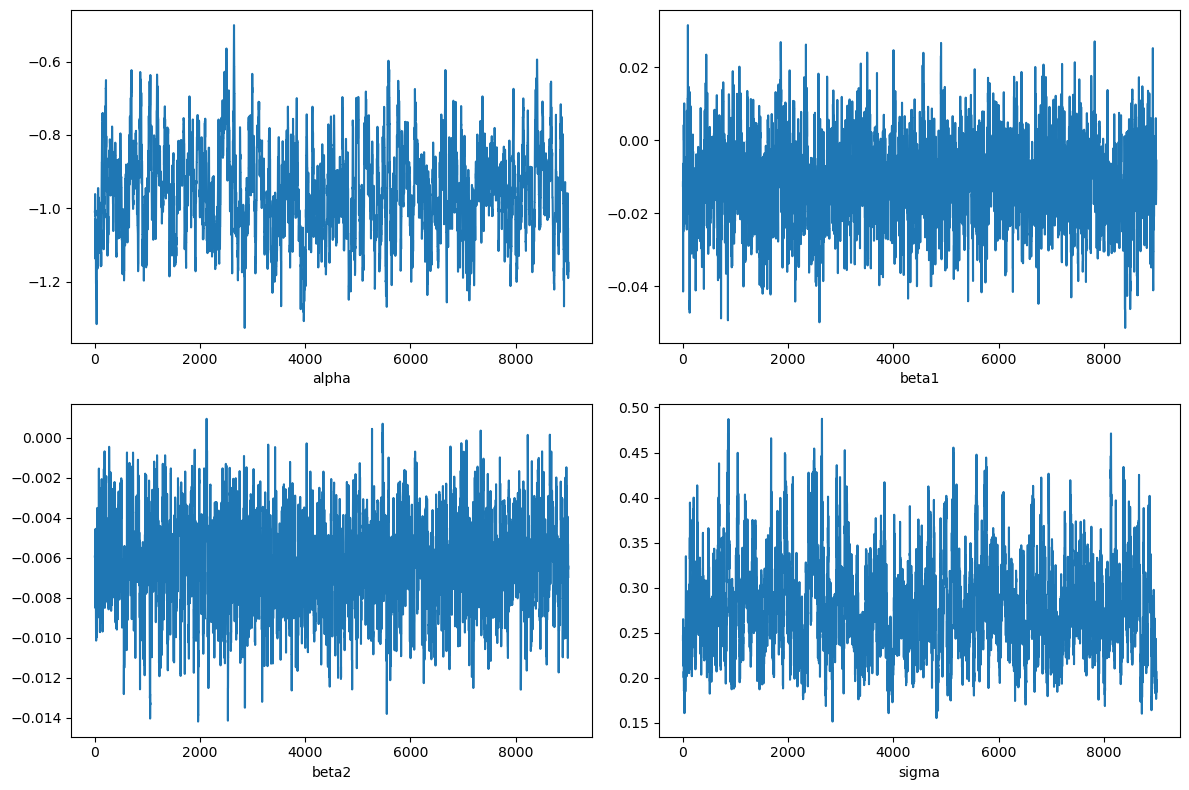

In [121]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].plot(chain[:, 0])
axs[0, 0].set_xlabel('alpha')
axs[0, 1].plot(chain[:, 1])
axs[0, 1].set_xlabel('beta1')
axs[1, 0].plot(chain[:, 2])
axs[1, 0].set_xlabel('beta2')
axs[1, 1].plot(chain[:, 3])
axs[1, 1].set_xlabel('sigma')
plt.tight_layout()
plt.show()

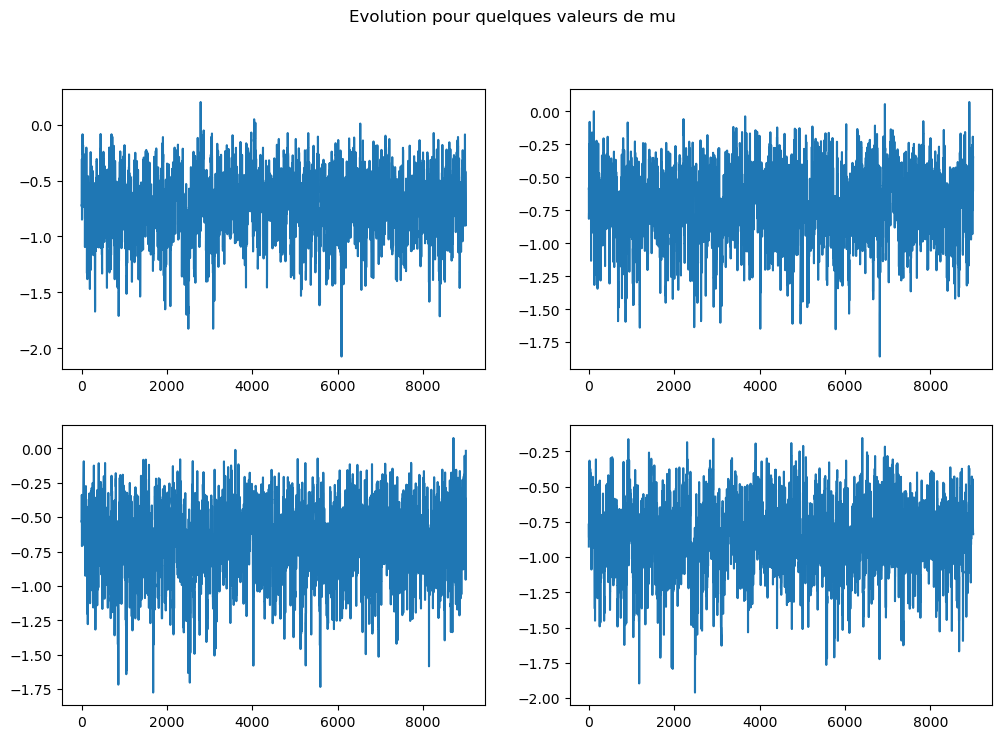

In [122]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].plot(chain_mu[:, 0])
axs[0, 1].plot(chain_mu[:, 3])
axs[1, 0].plot(chain_mu[:, 6])
axs[1, 1].plot(chain_mu[:, 9])
plt.suptitle('Evolution pour quelques valeurs de mu')
plt.show()

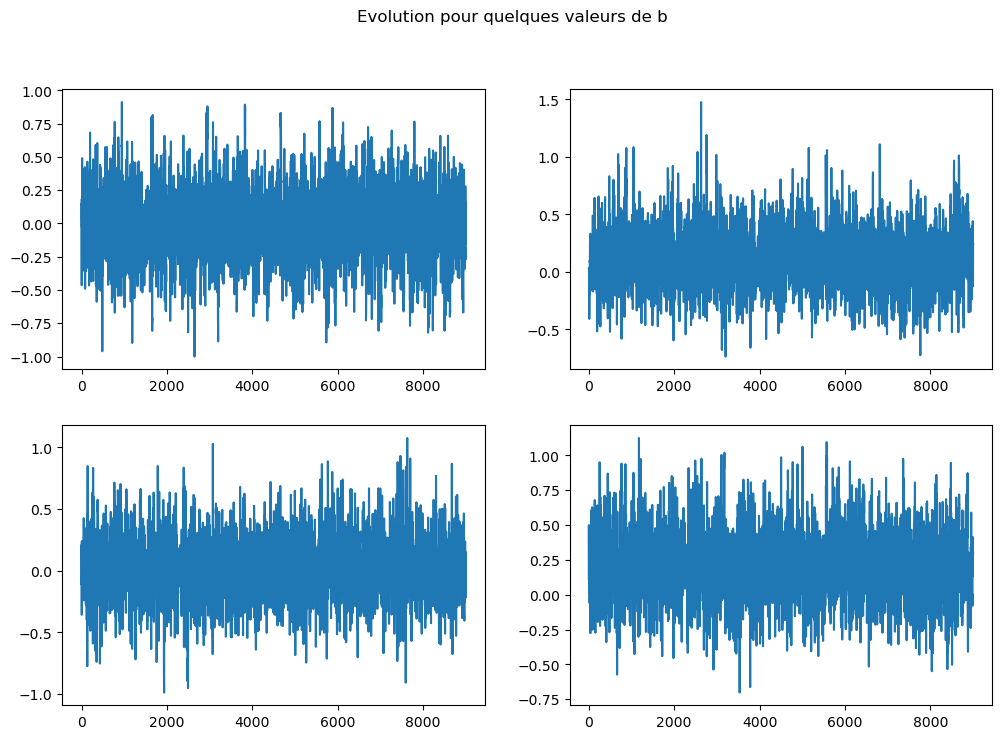

In [123]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].plot(chain_bi[:, 0])
axs[0, 1].plot(chain_bi[:, 3])
axs[1, 0].plot(chain_bi[:, 6])
axs[1, 1].plot(chain_bi[:, 9])
plt.suptitle('Evolution pour quelques valeurs de b')
plt.show()

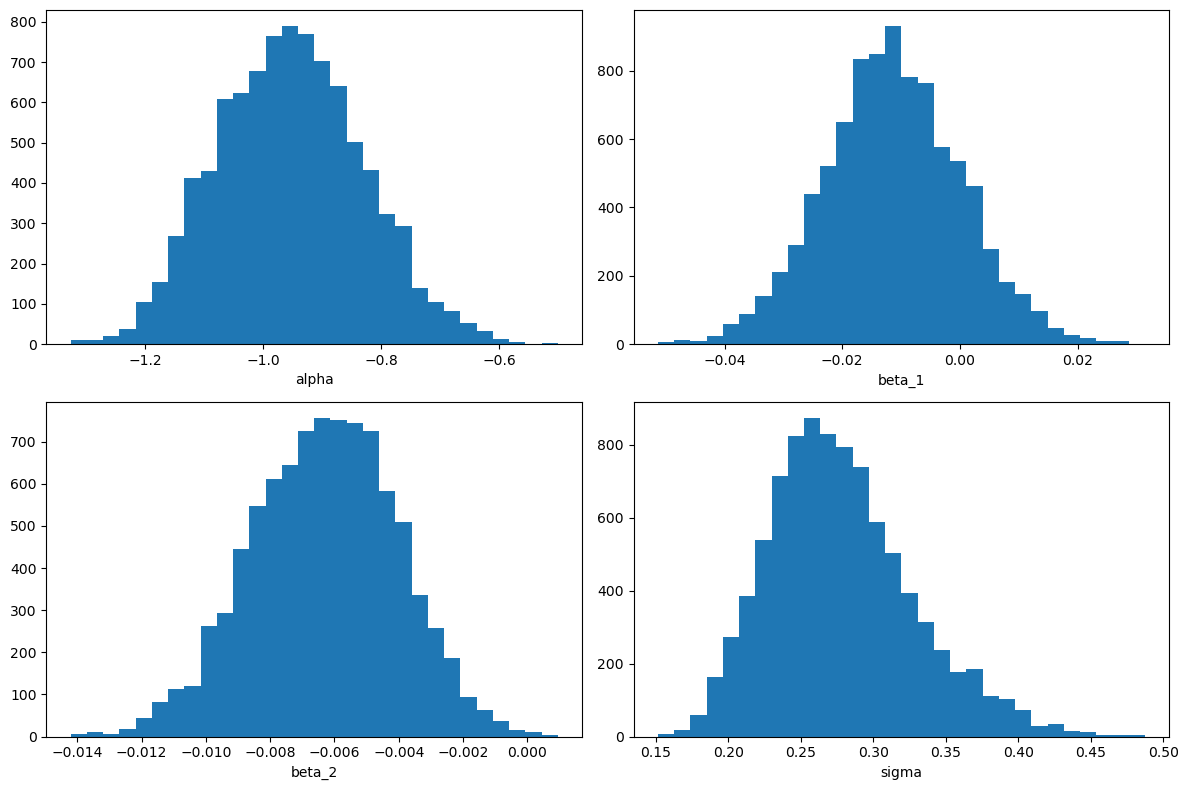

In [124]:
#Distribution des paramètres
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].hist(chain[:, 0], bins=30)
axs[0, 0].set_xlabel('alpha')
axs[0, 1].hist(chain[:, 1], bins=30)
axs[0, 1].set_xlabel('beta_1')
axs[1, 0].hist(chain[:, 2], bins=30)
axs[1, 0].set_xlabel('beta_2')
axs[1, 1].hist(chain[:, 3], bins=30)
axs[1, 1].set_xlabel('sigma')
plt.tight_layout()
plt.show()

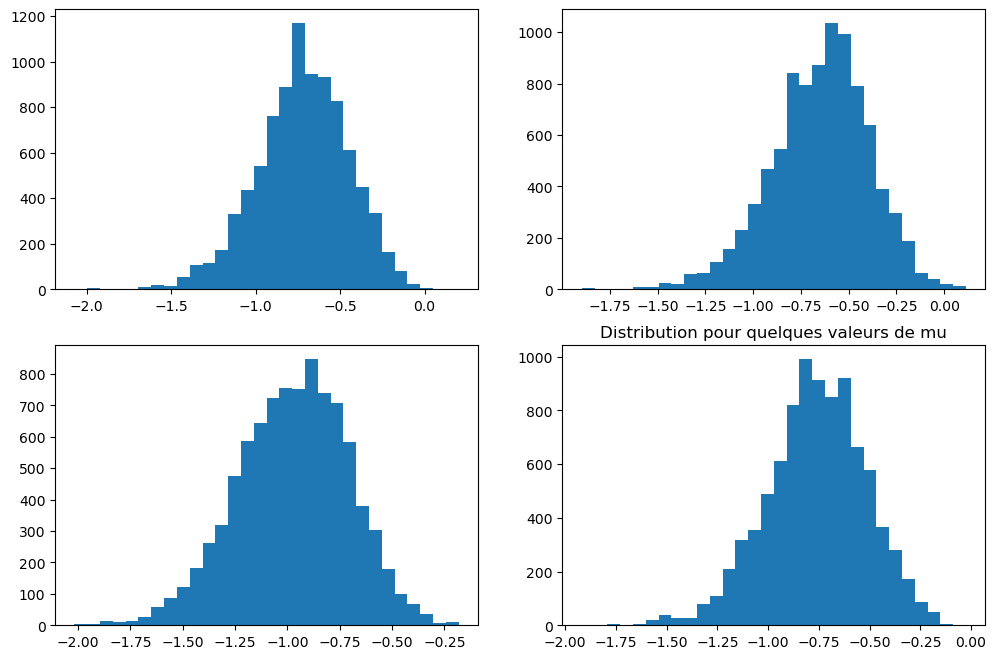

In [125]:
#Distribution des paramètres
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].hist(chain_mu[:, 0], bins=30)
axs[0, 1].hist(chain_mu[:, 4], bins=30)
axs[1, 0].hist(chain_mu[:, 8], bins=30)
axs[1, 1].hist(chain_mu[:, 12], bins=30)
plt.title('Distribution pour quelques valeurs de mu')
plt.show()

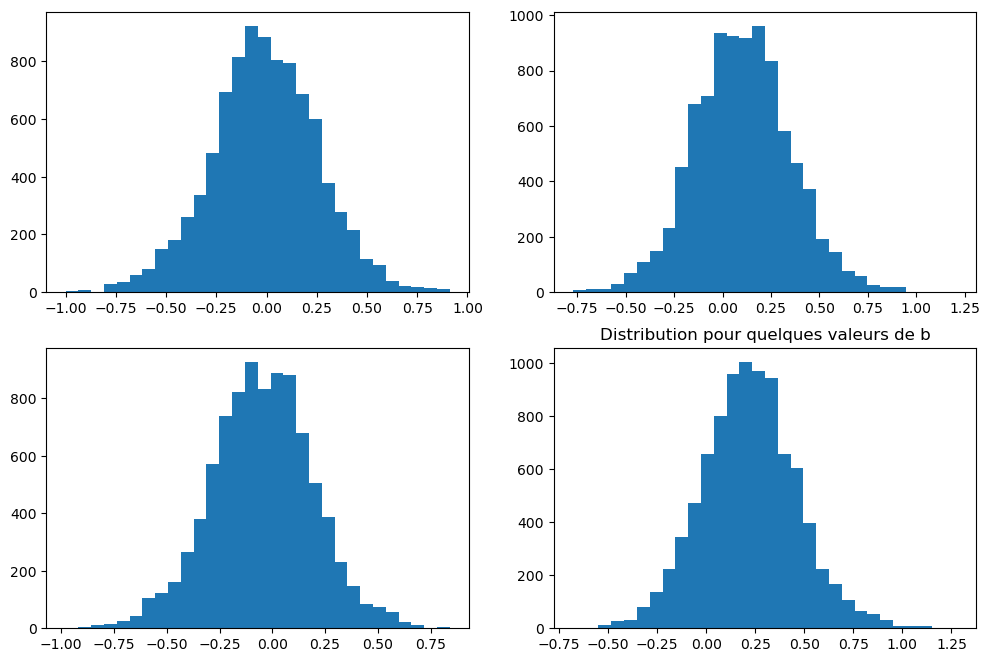

In [126]:
#Distribution des paramètres
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].hist(chain_bi[:, 0], bins=30)
axs[0, 1].hist(chain_bi[:, 4], bins=30)
axs[1, 0].hist(chain_bi[:, 8], bins=30)
axs[1, 1].hist(chain_bi[:, 12], bins=30)
plt.title('Distribution pour quelques valeurs de b')
plt.show()

In [127]:
import pandas as pd

# Calculate summary statistics
result = pd.DataFrame({'mean': chain.mean(axis=0),'sd': chain.std(axis=0),'mc_error':np.std(chain, axis=0) / np.sqrt(len(chain)),'val2.5pc':np.percentile(chain, 2.5, axis=0),'median': np.median(chain,axis=0),'val97.5pc': np.percentile(chain, 97.5, axis=0)},index=['alpha', 'beta_1', 'beta_2','sigma'])

print(result)

            mean        sd  mc_error  val2.5pc    median  val97.5pc
alpha  -0.953326  0.122861  0.001295 -1.177659 -0.954222  -0.702096
beta_1 -0.011428  0.011546  0.000122 -0.034180 -0.011702   0.011764
beta_2 -0.006309  0.002268  0.000024 -0.010984 -0.006255  -0.002088
sigma   0.277808  0.049798  0.000525  0.195078  0.272310   0.392060


## Interprétation

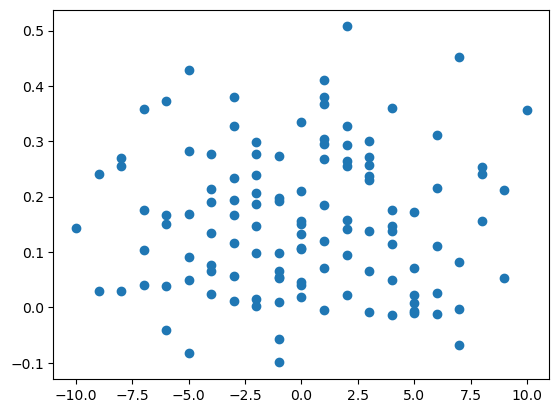

In [132]:
moy_b = chain_bi.mean(axis=0)
log_psi = []
for i in range(1,K):
    log_psi.append(result.iloc[:,1][0] + result.iloc[:,1][1] * year[i] + result.iloc[:,1][2]*(year[i]**2-22) + moy_b)
    
plt.plot(year,log_psi[1],linestyle=" ",marker="o");

## DAG?

In [128]:
pip install daft

^C
Note: you may need to restart the kernel to use updated packages.


SameLocationError: Attempted to add edge between `tau` and `b` but they share the same location.

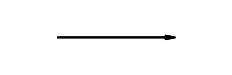

In [129]:
import daft

pgm = daft.PGM()

pgm.add_node('beta1', r'$\beta_1$')
pgm.add_node('beta2', r'$\beta_2$')
pgm.add_node('tau', r'$\tau$')
pgm.add_node('sigma', r'$\sigma$', fixed=True)
pgm.add_node('alpha', r'$\alpha$', x=0, y=0)

pgm.add_node('mu', r'$\mu_i$')
pgm.add_node('logitp0', r'$\text{logit}(p_{0,i})$')
pgm.add_node('logitp1', r'$\text{logit}(p_{1,i})$')
pgm.add_node('logPsi', r'$\log(\Psi_i)$', x=2, y=0)
pgm.add_node('b', r'$b_i$')

pgm.add_node('r0', r'$r_{0,i}$', observed=True)
pgm.add_node('r1', r'$r_{1,i}$', observed=True)
pgm.add_node('n0', r'$n_{0,i}$')
pgm.add_node('n1', r'$n_{1,i}$')
pgm.add_node('year', r'$\text{year}_i$')

pgm.add_edge('alpha', 'logPsi')
pgm.add_edge('beta1', 'logPsi')
pgm.add_edge('beta2', 'logPsi')
pgm.add_edge('tau', 'b')
pgm.add_edge('b', 'logPsi')
pgm.add_edge('mu', 'logitp0')
pgm.add_edge('mu', 'logitp1')
pgm.add_edge('logPsi', 'logitp1')
pgm.add_edge('logitp0', 'r0')
pgm.add_edge('logitp1', 'r1')
pgm.add_edge('n0', 'r0')
pgm.add_edge('n1', 'r1')
pgm.add_edge('year', 'logPsi')

pgm.render()